# SimEnv Demo

This notebook is intended to show the functionality of the SimEnv which creates an environment for simulation of power-electronic driven microgrids with ad-hoc data generation.
It can be used to to train and test reinforcement learing agents (e.g., from 
https://juliareinforcementlearning.org/).
These agents can learn to handle different control tasks and can be compared to classical control approaches.

The dynmaic bahaviour of the envorinment is simulated using linear state-space systems.
It interacts step-wise with the agent/controller like shown in the figure below.
Based on the input/action `u` at timestep `k` the state `x` is calculated.

  
![](figures/RL_env.png "")


To use the Dare tool the Dare package has to be loaded:

In [1]:
using Dare

WebIO._IJuliaInit()

## Simplest initialisation
The easiest way to initialize an environment is as follows:

In [2]:
env = SimEnv(num_sources = 2, num_loads = 1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:       64
Number of nonzeros in inequality constraint Jacobian.:       18
Number of nonzeros in Lagrangian Hessian.............:      407

Total number of variables............................:       16
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       16
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality co

[ Info: 3 Current limits set to 1000 A - please define in nc.parameters -> source -> i_limit! What???
[ Info: 3 Voltage limits set to 1.05*nc.parameters[grid][v_rms] - please define in nc.parameters -> source -> v_limit! Whatt???


# SimEnv

## Traits

| Trait Type        |                                            Value |
|:----------------- | ------------------------------------------------:|
| NumAgentStyle     |          ReinforcementLearningBase.SingleAgent() |
| DynamicStyle      |           ReinforcementLearningBase.Sequential() |
| InformationStyle  | ReinforcementLearningBase.ImperfectInformation() |
| ChanceStyle       |           ReinforcementLearningBase.Stochastic() |
| RewardStyle       |           ReinforcementLearningBase.StepReward() |
| UtilityStyle      |           ReinforcementLearningBase.GeneralSum() |
| ActionStyle       |     ReinforcementLearningBase.MinimalActionSet() |
| StateStyle        |     ReinforcementLearningBase.Observation{Any}() |
| DefaultStateStyle |     ReinforcementLearningBase.Observation{Any}() |

## Is Environment Terminated?

No

## State Space

`ReinforcementLearningBase.Space{Vector{IntervalSets.ClosedInterval{Float64}}}(IntervalSets.ClosedInterval{Float64}[-1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0])`

## Action Space

`ReinforcementLearningBase.Space{Vector{IntervalSets.ClosedInterval{Float64}}}(IntervalSets.ClosedInterval{Float64}[-1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0])`

## Current State

```
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
```


This creates an environment consisting of an electrical power grid with two sources `num_sources = 2` (which could be for example an inverter fed by a PV plant or a wind turbine or battery) - supplying one load `num_sources = 1`.
An easy exemplary example is shown in the figure below, where a load (an electric car to be charged) is supplied by 2 sources (inverters, fed PV plant and wind turbine) via two transmition lines.

![](figures/ExampleGrid1.png "")

For better visuablilty an exemplary shaded electircal circut in the background is displayed as single phase diagram.
(By default a three-phase four wire system is created).
If it is not defined during the initialization of the env, all parameters (connections between the different sources and loads, parameters of the electric components,...) are drawn randomly, while a few are set to fixed value per default.
One of the latter would be for example the stepsize `ts`. After the initialization a step-wise interaction with the environment is possible. 
As can be seen in the first picture, an action can be selected and the env can be executed with it. 
Based on that action `u_k` and the internal state-space system (defined depending on the electric components - for more information about the odernary differential equation,... see NodeConstructor_DEMO.ipynb) the system is evovled for one timestep and the new states `x_k+1` of the system are calulated.

### States and actions

First, the current state of the environment is checked:


In [3]:
env.state

36-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

If the state is not zero, but should be in the beginning, the reset method can be used which sets the state to the internally defined `x0` (which consists of zeros per default).
If we do not want to not start from zero, we could set `x0` in the initialisation of the env:

In [4]:
using ReinforcementLearning
env.x0 = 0.1 * ones(length(env.state_space))
reset!(env)
env.state

36-element Vector{Float64}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 ⋮
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

To interact wiht the env, first it has to be figured out how many actions are needed. Therefore the length of the action space can be checked:




In [5]:
n_a = length(env.action_space)

6

The six action requested by the environment belong to the 2 sources. Since per default the env produces a three-phase system we need one action per phase per source -> 6 actions.
To exite the env by an action the following command can be used:

In [6]:
env([0.2, 0.2, 0.2, 0.3, 0.3, 0.3])

36-element Vector{Float64}:
 -0.1155929296537127
 -0.002870633792242831
 -0.016338915360042654
 -6.362828166572387e-12
 -0.2320843254197725
 -1.0487322313428742e-5
 -4.357895249846855e-12
 -8.845521222281035e-5
 -0.00021755552634178518
  1.4103169050298837e-5
  0.09139285984402568
  0.10000012835672518
 -0.1155929296537127
  ⋮
 -0.11559292965371275
 -0.0028706337922428165
 -0.016338915360042793
 -6.362800119379864e-12
 -0.23208432541977259
 -1.0487322313404212e-5
 -4.357926335925905e-12
 -8.845521222273557e-5
 -0.0002175555263416874
  1.4103169050480222e-5
  0.09139285984402563
  0.10000012835672518

Here, the first source got an action of `0.2` to all three phases, while the second source got an action of `0.3` to all three phases.
As can be seen, the states have changed from 0.1 to different values.
To get a little bit more intuition about the different states, the state_ids can be investigated:

In [7]:
env.state_ids

36-element Vector{String}:
 "source1_i_L1_a"
 "source1_v_C_filt_a"
 "source1_i_L2_a"
 "source1_v_C_cables_a"
 "source2_i_L1_a"
 "source2_v_C_filt_a"
 "source2_v_C_cables_a"
 "cable1_i_L_a"
 "cable2_i_L_a"
 "cable3_i_L_a"
 "load1_v_C_total_a"
 "load1_i_L_a"
 "source1_i_L1_b"
 ⋮
 "source1_i_L1_c"
 "source1_v_C_filt_c"
 "source1_i_L2_c"
 "source1_v_C_cables_c"
 "source2_i_L1_c"
 "source2_v_C_filt_c"
 "source2_v_C_cables_c"
 "cable1_i_L_c"
 "cable2_i_L_c"
 "cable3_i_L_c"
 "load1_v_C_total_c"
 "load1_i_L_c"

The labels define to which source the state belongs and what it is about. 
For example the first state is called `"source1_i_L1_a"`. That tells, it belongs to the first source (in the picture above the PV plant) and represents the current `i` through the incductor `L1` of phase `a`.
For example, this information can be used to control the current through the filter inductance (or to learn this control task).

In [8]:
env.state_space

Space{Vector{IntervalSets.ClosedInterval{Float64}}}(IntervalSets.ClosedInterval{Float64}[-1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0  …  -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0, -1.0..1.0])

Since the state space of the env tells, that it ranges from -1.0..1.0, the current through the filter inductor in the example is normalized by the maximal current allowed to flow through the inductor.
If this parameter is not defined it it set per default based on the filter layout happening in the env.



All (technical) parameters needed for the simulation are defined in the parameter dict (For more detailed information see below and NodeConstructor_DEMO.ipynb).
It can be investigated by:



In [9]:
env.nc.parameters


Dict{Any, Any} with 4 entries:
  "source" => Any[Dict{Any, Any}("L1"=>0.00151792, "C"=>3.46777e-5, "mode"=>"Dr…
  "grid"   => Dict{Any, Any}("f_grid"=>50, "Δfmax"=>0.005, "fs"=>10000.0, "proc…
  "load"   => Any[Dict{Any, Any}("Z"=>3.39489e-14-4.24611e-5im, "C"=>74.965, "L…
  "cable"  => Any[Dict{Any, Any}("Cb"=>4.10272e-11, "Lb"=>6.42385e-7, "Rb"=>0.0…

The limit of the filter inductor current can be found using:

In [10]:
env.nc.parameters["source"][1]["i_limit"]

145.62839887137136

Which returns the current limit (belonging to the inductor) of source one.
The voltage limit for normalization is depending on the filter capacitor and calulated - if not defined - based on the capacitance.
The same concept holds for the cables and loads (parametrization can be found in the parameter dict, too).

Since the action space is defined in a range -1.0..1.0, the actions are "normalized" by the DC-link voltage of the specific source. 
In the simulation the chosen action is multiplied by half of the DC-link voltage (and can be interpreted as modulation index in an electrical engineering context).
The DC-link voltage can be found in (or set via) the parameter dict, too:

In [11]:
env.nc.parameters["source"][1]["vdc"]

800

### Parameters

The wanted setting of the simulation can be adjusted using the parameter dict. 
The most important parts will be investigated in the following.
Like already shown above the parameter dict splits up into different parts describing different sections of the grid: gird, source, load, cable.

An example for a single phase 3 Bus grid consisting of 2 sources (LC and LCL filter), 3 cables and 1 RLC load is shown in the following figure highligthing some of the defineable parameters and states.

![](figures/ExampleGrid3.png "")

A few states are labeled in red, while a few parameters defined in the parameter dict are marked in green.
Now the most important parts of the parameter dict are investigated in more detail.

#### Grid
Defines the basic setting of the whole electrical power grid. The moste important parameters are:

- `"f_grid"`: grid frequency (frequency of the sine wave) (default: 50 Hz)
- `"phases"`: number of phases in the electric power grid (exclusive neutral). (default: 3)
- `"fs"`: sample frequency of the simulation. Every step the environment if simulated `1/fs` s forward (default: 10 kHz)
- `"v_rms"`: root mean square value of the basic grid voltage (default: 230 V)
- ...


In [12]:
env.nc.parameters["grid"]

Dict{Any, Any} with 8 entries:
  "f_grid"        => 50
  "Δfmax"         => 0.005
  "fs"            => 10000.0
  "process_start" => 0.04
  "phase"         => 3
  "ramp_end"      => 0.04
  "ΔEmax"         => 0.05
  "v_rms"         => 230

#### Source
A selection of the most important parameters that can be defined and configured via the parameter dict is given in the following:

- `"pwr"`: defines the maximum aparent power of the source (default: random)
- `"source_type"`: defines the type of the electric component sitting on the DC side, e.g. ideal (constant `vdc`), PV,... (default: ideal)
- `"control_type"`: defines whether the source is classically controlled or RL controlled (default = "classic")
- `"mode"`: allows to specify which control mode the source (default = "Droop", and classic control_type) (for more information, see Classic_Controllers_Notebook.iypnb)
- `"vdc"`: DC-link voltage, fixed if `"source_type"` is ideal (drawn random $U$[690, 800] V), otherwise drawn from function
- `"fltr"`: Filter type [L, LC, LCL] (default: random)
- `"i_limit"`: maximal allowed current flowing through the inductor(s) (default: calculated based on filter parameters)
- `"v_limit"`: maximal allowed voltage across the capacitor (default: calculated based on filter parameters).
- ...

For all information about the parameters which can be defined investigate the parameter dict itself or have a look into the documentation (`LINK`)

In [13]:
env.nc.parameters["source"][1]

Dict{Any, Any} with 30 entries:
  "L1"           => 0.00151792
  "C"            => 3.46777e-5
  "mode"         => "Droop"
  "fltr"         => "LCL"
  "pwr"          => 45000.0
  "source_type"  => "ideal"
  "L2"           => 0.000207586
  "R_C"          => 2.20536
  "std_asy"      => 11250.0
  "σ"            => 0.0
  "i_limit"      => 145.628
  "v_rip"        => 0.01537
  "v_δ_set"      => 0.0
  "vdc"          => 800
  "τv"           => 0.002
  "k"            => 0
  "control_type" => "classic"
  "v_pu_set"     => 1.0
  "τf"           => 0.002
  "i_rip"        => 0.15
  "κ"            => 0.0
  "R1"           => 0.303585
  "v_limit"      => 1209.22
  "Δt"           => 0.02
  "γ"            => 36000.0
  ⋮              => ⋮

#### Load
Defines passive loads which can be pluged/connected to the grid. All combinations of the passive components of a resistor, inductor and capacitor ("impedance") can be chosen:

- `"impedance"`: type/circuit of the load (can be something out of [RLC, RL, RC, LC, R, L, C]). Components will be connected in parallel (default: random)
- `"pwr"`: apparant power of drawn from the load assuming fixed vrms grid voltage and frequency and the number of phases (see parameters of "grid")
- `"pf"`: power factor resulting from chosen parameters
- `"Z"`: impedance resulting from chosen parameters
- `"R"`: load resistance
- ...

For all information about the parameters which can be defined investigate the parameter dict itself or have a look into the documentation (`LINK`)

In [14]:
env.nc.parameters["load"]

1-element Vector{Any}:
 Dict{Any, Any}("Z" => 3.394891132116645e-14 - 4.246113341510166e-5im, "C" => 74.965, "L" => 93.017, "R" => 53107.678, "pwr" => 3.7375356528650036e9, "pf" => -7.995291708175907e-10, "impedance" => "RLC")

#### Cable
The cables are modelled using PI-models like shown in the figure above.
If no parameters are defined they are chosen based on the power flowing through the cable.


- `"len"`: length of the cable (default: random [1m, 1km])
- `"i_limit"`: mamimal allowed current flowing through the inductor (default: calculated based on power flow and inductance)
- `"v_limit"`: since the capacitance it added to the one (if) defined in the source, the limit for the voltage can be found in the source parameter dict
- `"Cb"`: cable capacity coatings (default: 0.4 µF)
- `"Lb"`: cable operating inductor (default: 0.264 mH)
- `"Rb"`: cable AC resistor (default: 0.722 Ohm)
- `"C"`: cable capacity (default: `"len"`*`"Cb"`)
- `"L"`: cable inductance (default: `"len"`*`"Lb"`)
- `"R"`: cable resistance (default: `"len"`*`"Rb"`)

In [15]:
env.nc.parameters["cable"]

3-element Vector{Any}:
 Dict{Any, Any}("Cb" => 4.102718297750931e-11, "Lb" => 6.423854130315936e-7, "Rb" => 0.0017174564527878925, "C" => 4.102718297750931e-11, "i_limit" => 23.845224332918246, "len" => 1.0, "L" => 6.423854130315936e-7, "R" => 0.0017174564527878925)
 Dict{Any, Any}("Cb" => 1.1126603303809104e-11, "Lb" => 2.0999395099615256e-6, "Rb" => 0.002456582741019471, "C" => 1.1126603303809104e-11, "i_limit" => 8.072227704973601, "len" => 1.0, "L" => 2.0999395099615256e-6, "R" => 0.002456582741019471)
 Dict{Any, Any}("Cb" => 4.7692622590331655e-11, "Lb" => 5.665826087342834e-7, "Rb" => 0.0015608203776853122, "C" => 4.7692622590331655e-11, "i_limit" => 56.03940947161604, "len" => 1.0, "L" => 5.665826087342834e-7, "R" => 0.0015608203776853122)

## Interact with the Env
To interact with the env, the above decribed function (`env(action)`) can be called in a loop and the state logged during this process:

In [16]:
env.x0 = zeros(length(env.state_space))   # set initial values back to zero

# run 3 steps
for _ in 1:3
    env([0.2, 0.2, 0.2, 0.3, 0.3, 0.3])
end

env.state   # print state

36-element Vector{Float64}:
 0.09305741850764389
 0.00941415252118272
 0.09380168653792899
 0.0001178109329700646
 0.10049882076879775
 9.824929585698888e-5
 0.00010036194157404673
 0.22508184131090667
 0.2317985033780727
 0.21037086635568947
 0.00026741732694743033
 0.00010000044521210018
 0.09305633649117169
 ⋮
 0.13934546787890578
 0.014085177850087212
 0.14046352316371485
 0.00013534130200838808
 0.14950258596863034
 0.00010596587631601847
 0.00010913875943594653
 0.3352323260196112
 0.346004883330593
 0.3151790487945805
 0.0002674568479916947
 0.00010000045280609648

The Dare toolbox provides a more enhanced methode to run an experiment with a specific number of steps and even more episodes.
It is based in the `run` command provided by the ReinforcementLeaning.jl (https://github.com/JuliaReinforcementLearning/ReinforcementLearning.jl/blob/master/src/ReinforcementLearningCore/src/core/run.jl) toolbox and therefore can be used to train RL agents.

To examine this functionality in more detail the example environment is reduced to a single phase grid with 1 source and 1 load as shown in the figure below:

![](figures/ExampleGrid4.png "")

To get an env consisting of that specific setting with the correct filter type and load, the parameter dict is defined in beforehand an handed over to the env.

Instead of `num_sorces` and `num_loads`, now the parameter dict and the connectivity matrix CM is used which defines if there is a connection between two nodes (e.g., source <-> load) (-> !=0) or if there is no connection (in that case the entry is `0`). For more information about the CM matrix see NodeConstructor_DEMO.ipynb.

To create a usefull example we first calulate a load which fits in case of power rating to the power the source can provied.
Therefore the function `Parallel_Load_Impedance()` provied by the Dare package is used which calulates the passive parameters for a load for specified aparant power drawn at `v_rms` (assuming 50 Hz per default - but configurable):

In [30]:
S_source = 200e3

S_load = 150e3
pf_load = 1
v_rms = 230
R_load, L_load, X, Z = Parallel_Load_Impedance(S_load, pf_load, v_rms)

(1.058, Inf, Inf, 1.058 + 0.0im)

Then we use these values during definiton of the env in the parameter dict:

In [36]:
CM = [0. 1.
    -1. 0.]

parameters = Dict{Any, Any}(
        "source" => Any[
                        Dict{Any, Any}("pwr" => S_source, "control_type" => "classic", "mode" => "Step", "fltr" => "LC"),
                        ],
        "load"   => Any[
                        Dict{Any, Any}("impedance" => "R", "R" => R_load),
                        ],
        "cable"   => Any[
                        Dict{Any, Any}("R" => 1e-3, "L" => 1e-4, "C" => 1e-4, "i_limit" => 1e4, "v_limit" => 1e4,),
                        ],
        "grid" => Dict{Any, Any}("fs"=>1e4, "phase"=>3, "v_rms"=>230, "f_grid" => 50, "ramp_end"=>0.0)
    )


env = SimEnv(CM = CM, parameters = parameters)

env.state_ids

┌ Info: 3 Voltage limits set to 1.05*nc.parameters[grid][v_rms] - please define in nc.parameters -> source -> v_limit! Whatt???
└ @ Dare /home/webbah/Dokumente/GIT/dare/src/env.jl:336


15-element Vector{String}:
 "source1_i_L1_a"
 "source1_v_C_filt_a"
 "source1_v_C_cables_a"
 "cable1_i_L_a"
 "load1_v_C_total_a"
 "source1_i_L1_b"
 "source1_v_C_filt_b"
 "source1_v_C_cables_b"
 "cable1_i_L_b"
 "load1_v_C_total_b"
 "source1_i_L1_c"
 "source1_v_C_filt_c"
 "source1_v_C_cables_c"
 "cable1_i_L_c"
 "load1_v_C_total_c"

As can be seen, the five states marked red  in the equivalent circuit diagram in the figure above can be found via the state_ids.
Analog, the action_ids can be found which consists only of 1 entry in case of a sinlge phase system.

In [18]:
env.action_ids

3-element Vector{String}:
 "source1_u_a"
 "source1_u_b"
 "source1_u_c"

To collect the data - so how the states evolved over time by the chosen actions - hooks (https://juliareinforcementlearning.org/docs/How_to_use_hooks/) are used which will be executed at different stages of the experiment.
Via theses hooks the data to be collected is stored in a `DataFrame` labels via the state- and action_ids. This all happens using the `DataHook` provided by the Dare package.
It only has to be defined which states and actions (and others...) should be logged during initialisation. Then the `DataHook` has to be handed over to the `run` command.

In the following we will collect all states and the action defined in the grid.
Additionally the number of source can be used to collect all the data for a specific source and a lot of other flags can be defined to collect more measurements (RMS, reward, powers,...).
For more details we refer to the documentation and the other example notebooks.

In [19]:
hook = DataHook(collect_state_ids = env.state_ids,
                collect_action_ids = env.action_ids
                #collect_sources  = [1]  # alternative
                )

DataHook(false, "episode_data/", nothing, nothing, nothing, Any[], Any[], Any[], Any[], Any[], Any[], ["source1_i_L1_a", "source1_v_C_filt_a", "source1_v_C_cables_a", "cable1_i_L_a", "load1_v_C_total_a", "source1_i_L1_b", "source1_v_C_filt_b", "source1_v_C_cables_b", "cable1_i_L_b", "load1_v_C_total_b", "source1_i_L1_c", "source1_v_C_filt_c", "source1_v_C_cables_c", "cable1_i_L_c", "load1_v_C_total_c"], Any[], ["source1_u_a", "source1_u_b", "source1_u_c"], 0×0 DataFrame, 0×0 DataFrame, 1, false, Vector{Float64}[], [0.0], String[], false, nothing, -1.0e6, 1, nothing, false, Any[], Any[], Any[], Any[], Any[], Any[], Any[], Any[], Any[])

Next step is to run the experiment. Therefore the `Power_System_Dynamics()` function from the `Dare_Wrapper` is called. 
That wrapper acts as a configuration tool to define the corresponding classic controllers and RL-agents and links inputs and outputs per controller/agent to the env states and actions depending on the `control_types` (classic or RL) and `mode`s (e.g., stepresponse (like in our example here), droop control mode,...).
This is exemplary shown in the diagram below.

Then the experiment is executed for, here, one episode. The length of the episode is defined depending on the parameter `env.maxsteps` (default = 500), which alternatively can be defined via `env.t_end` and `env.ts`. The run command then executes 500 steps applying the defined controllers in the env. 
Learning would also take place in these steps if RL agents were defined.
But the 500 steps only gets executed if non on the defined voltage and current limits of the states are exectued (which would be equivalent to a system crash!).
In that case a flag in the env is set (`env.done = true`) which stops the episode.

![](figures/DareWrapper.png "")

In [37]:
Power_System_Dynamics(env, hook, num_episodes = 1)

After the experiment, for example the `plot_hook_results()` function provided by the Dare package can be used to show the results of the simulated episode:

In [21]:
plot_hook_results(hook = hook, 
                    episode = 1,
                    states_to_plot  = env.state_ids,  
                    actions_to_plot = env.action_ids)


data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, y, and yaxis",
  "scatter with fields mode, name, type, x, y, and yaxis",
  "scatter with fields mode, name, type, x, y, and yaxis"
]

layout: "layout with fields height, legend, margin, plot_bgcolor, template, width, xaxis, yaxis, and yaxis2"

As can be seen, the states (belonging to the left y-axis) and the action (right y-axis) are plotted over the 500 timesteps while one timestep takes `ts = 1e-4` s resulting in an epiode time of 0.05 s.
As can be seen, the not normalized states and actions are plotted/collected.

Additionally the `DataFrame` in the hook can be used to directly get the vactor of a specific state (here we take the first state_id):


In [38]:
id = env.state_ids[1]
println(id)
hook.df[:, id]

source1_i_L1_a


1000-element Vector{Float64}:
   0.0
   0.0
  91.04621944312855
 167.40966922627877
 224.48973052410716
 261.1890452125697
 278.10336106932743
 277.55367083261325
 263.4440478844347
 240.32688612859278
   ⋮
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519
 204.02614278089519

## AC-grid example
To run an A-grid where for example the source created a sin-wave with a frequency of `env.nc.parameters["grid"]["f_grid"]` just the control mode has to be changed:

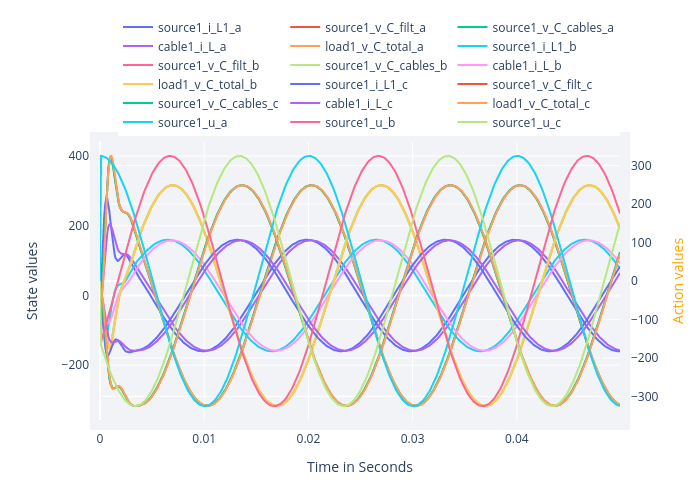

In [29]:
CM = [0. 1.
    -1. 0.]


parameters = Dict{Any, Any}(
        "source" => Any[
                        Dict{Any, Any}("pwr" => S_source, "control_type" => "classic", "mode" => "Swing", "fltr" => "LC", "i_limit" => 1e4, "v_limit" => 1e4,),
                        ],
        "load"   => Any[
                        Dict{Any, Any}("impedance" => "R", "R" => R_load)
                        ],
        "cable"   => Any[
                        Dict{Any, Any}("R" => 1e-3, "L" => 1e-4, "C" => 1e-4),
                        ],
        "grid" => Dict{Any, Any}("fs"=>1e4, "phase"=>3, "v_rms"=>230, "f_grid" => 50, "ramp_end"=>0.0)
    )

env = SimEnv(CM = CM, parameters = parameters)

hook = DataHook(collect_state_ids = env.state_ids,
                collect_action_ids = env.action_ids
                #collect_sources  = [1]  # alternative
                )

Power_System_Dynamics(env, hook, num_episodes = 1)

plot_hook_results(hook = hook, 
                    episode = 1,
                    states_to_plot  = env.state_ids,  
                    actions_to_plot = env.action_ids)

Based on that introdcution more enhanced environments can be created consiting of more sources and loads connected to each other
- controlled by classic grid controllers for example to chare the power based on the droop concept --> See: `Classic_Controllers_Notebooks`
- train RL agents to fullfill voltage control for single sources --> See: `TODO`
- train RL agents to interact in a bigger power grid with classically controller sources --> See: `Merge-notebook TODO`